In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
from plot_gr_dose_response import plot_dr
from waterfall_plot import *
%load_ext autoreload
%autoreload 2

In [2]:
gr_output = pd.read_table('https://github.com/datarail/gr_metrics/raw/master/OUTPUT/toy_example_output.tsv')
gr_metric = pd.read_table('https://github.com/datarail/gr_metrics/raw/master/OUTPUT/python_input1_GRmetrics.tsv')

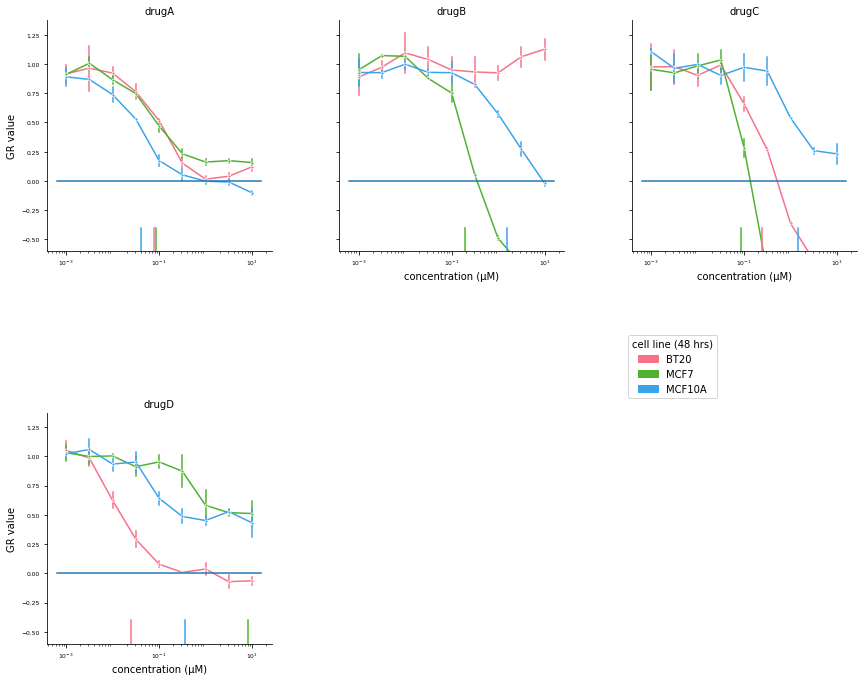

In [3]:
plot_data = gr_output[gr_output['time']==48]
plot_data = plot_data[plot_data['perturbation']==1]
plot_dr(plot_data,gr_metric,time_col='time', size_override = 5)

### Ploting a single waterfall plot from processed data with median and std GR metric values.
#### Each line in the input file will be represented by a bar.
#### Additional color saturation can be used to visualize continuous metadata variable such as dose or time. 

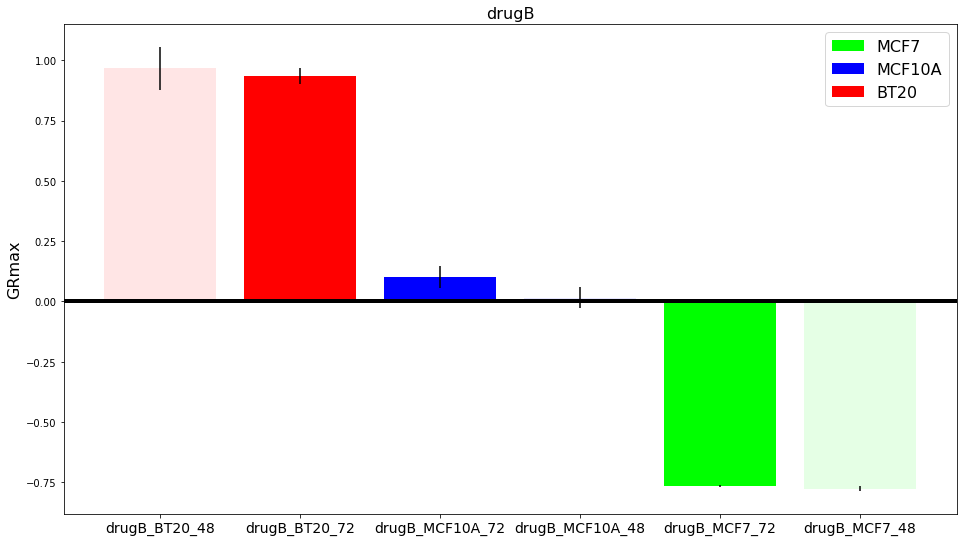

In [4]:
drugb = gr_metric[gr_metric.agent=='drugB']
drugb = add_median_std(drugb,custom_grouping=['agent','cell_line','time'])
g = waterfall_plot(drugb,title_col='agent', saturation_sep='time')

### Make panels where each plot represents a drug
#### Each color represents a cell line
#### Treatment time is mapped as color saturation.

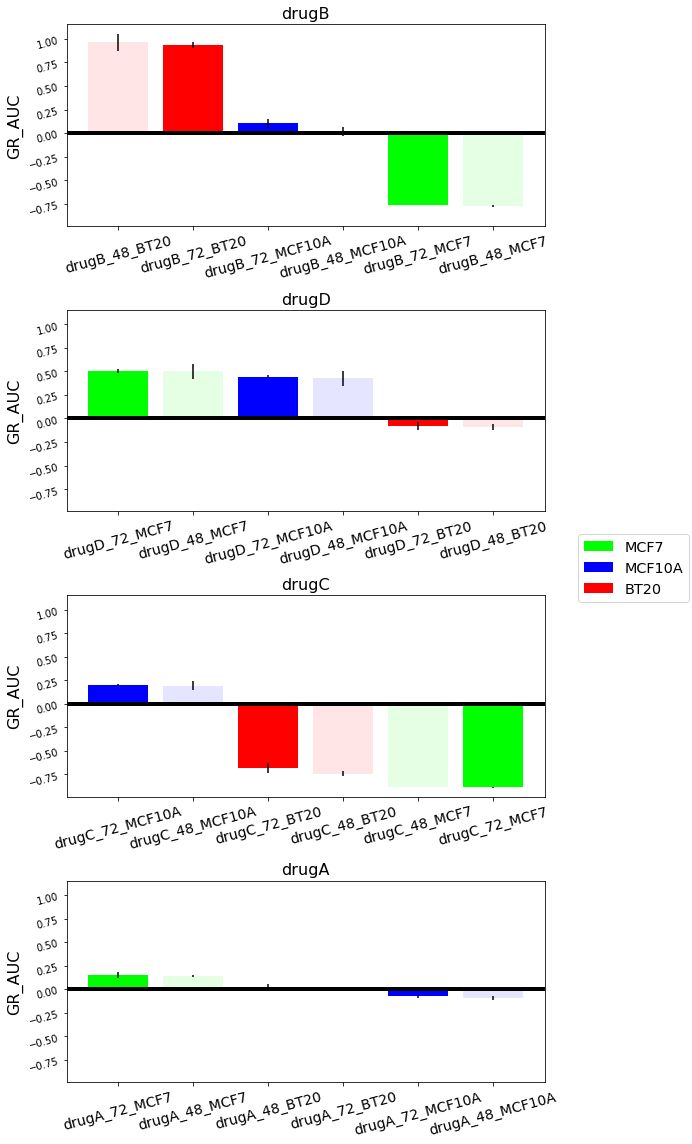

In [5]:
g = waterfall_plot_panel(add_median_std(gr_metric),x_color_sep = 'cell_line',row_by='agent',saturation_sep='time', col_by=None, y_gr_col='GR_AUC', figsize=(8,16))

### Make panels where each plot represents a cell line
#### Each color represents a drug
#### Treatment time is used to separate columns.

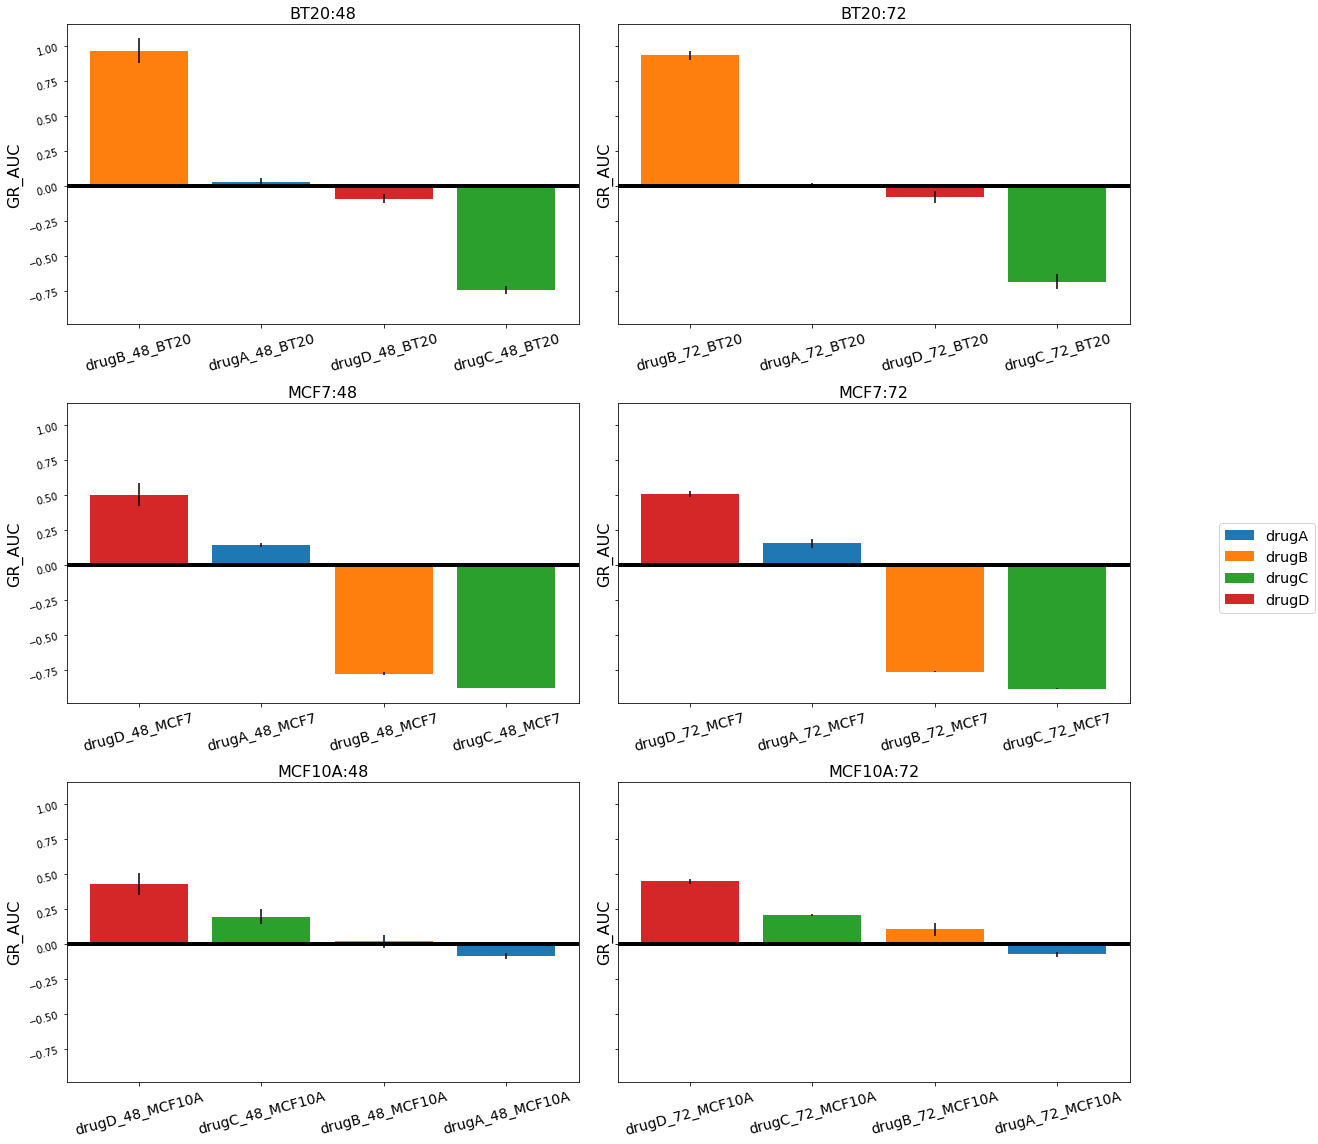

In [6]:
g = waterfall_plot_panel(add_median_std(gr_metric),x_color_sep = 'agent',row_by='cell_line', col_by='time', y_gr_col='GR_AUC', figsize=(16,16))